In [1]:
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('df/Affected/data_31.csv')
data.head()

,Division,District,2020/04/7,2020/04/8,2020/04/9,2020/04/10,2020/04/11,2020/04/12,2020/04/13,2020/04/14,...,2020/04/29,2020/04/30,2020/05/01,2020/05/02,2020/05/03,2020/05/04,2020/05/05,2020/05/06,2020/05/07,2020/05/08
0,Chattogram,Cumilla,2,1,4,5,8,9,9,14,...,81,93,99,104,105,105,112,130,135,150
1,Chattogram,Feni,0,0,0,0,0,0,0,0,...,4,6,6,6,6,6,6,7,7,8
2,Chattogram,Brahmanbaria,0,0,0,0,4,6,6,8,...,37,40,43,43,44,55,56,56,56,57
3,Chattogram,Rangamati,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4
4,Chattogram,Noakhali,0,0,0,0,0,0,0,0,...,6,6,9,9,15,17,21,22,23,27


In [2]:
def numbers_by_division(df, date):
    return df.groupby('Division')[date].sum().sort_values(ascending=False)

def numbers_by_district(df, date):
    return df.groupby('District')[date].sum().sort_values(ascending=False)

def numbers_by_division_all(df):
    return df.groupby('Division').sum()

def district_distribution(df,date,div):
    
    d = (df.loc[df['Division']==div])
    return d[['District',date]].sort_values(by=[date], ascending=False)

def district_distribution_full(df,div):
    
    d = (df.loc[df['Division']==div])
    col = list(df.head())
    return d[col[1:]]


    
def division_data(df, div):
    
    df = (data.groupby('Division').sum())
    dates = list(df.head())
    division_count = {a[0]:list(zip(dates,a[1].values.tolist())) for a in df.iterrows()}
    x = [int(a.replace('2020/','')) for a,b in division_count[div]] 
    y = [b for a,b in division_count[div]]
    
    return x,y

def division_inc_data(df, div):
    
    x,y = division_data(df, div)
    y = [y[i]-y[i-1] for i in range(1,len(y))]
    
    return x[1:],y


def district_data(df, dis):
    
    df =(df.loc[df['District']==dis])
    df.drop(['Division'],axis=1)
    dates = list(df.head())[2:]
    counts = []
    for row in df.iterrows():
        counts = row[1].values.tolist()
     
    counts = counts[2:]
    district_count = list(zip(dates,counts))

    x = [(a.replace('2020/','')) for a,b in district_count] 
    y = [b for a,b in district_count]
    
    return x,y

def district_inc_data(df, dis):
    
    x,y = district_data(df, dis)
    y = [y[i]-y[i-1] for i in range(1,len(y))]
    
    return x[1:],y

def plot_graph(x,y,xlabel,ylabel,title):
    
    extension = max(y)/60
    plt.figure(figsize=(len(x),6))
    plt.bar(x,y)
    for index, value in enumerate(y):
        plt.text((index-.10), value+extension, str(value))
#     plt.xticks(list(range(x[0],max(x)+1)),[str(i) for i in range(x[0],max(x)+1)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    
    plt.title(title)
    plt.show()
    
def plot_graph_division(x,y,xlabel,ylabel,title):
    
    extension = max(y)/60
    plt.figure(figsize=(len(x)+3,6))
    plt.bar(x,y)
    for index, value in enumerate(y):
        plt.text((index+-.10), value+extension, str(value))
#     plt.xticks()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    
    plt.title(title)
    plt.show()
    
def latest_update_division(div):
    col = list(data.head())
    date = col[-1]
    d = district_distribution(data,date,div)
    d = d.to_dict()
    x = [dis for _, dis in d['District'].items() ]
    y = [num for _, num in d[date].items() ]
    plot_graph_division(x,y,'Districts of '+ div,'Confirmed Cases','Confirmed COVID-19 cases')
    
def top_districts(val):
    col = list(data.head())
    date = col[-1]
    d = numbers_by_district(data,date)
    d = d.to_dict()
    x = [dis for dis in d.keys() ]
    y = [num for num in d.values() ]
    plot_graph_division(x[:val],y[:val],"Top "+str(val)+ ' districts in confirmed cases','Confirmed Cases','Confirmed COVID-19 cases')
    
def plot_in(x,y):
    
    plot_graph(x,y,'From '+str(min(x))+' April to '+str(max(x))+' April 8:00 AM','Confirmed Cases','Confirmed COVID-19 cases in each day')
    
def plot_district(dis):
    x,y = district_data(data, dis)
    plot_graph(x,y,'From '+str(min(x))+' April to '+str(max(x))+' April 8:00 AM','Confirmed Cases','Total Confirmed COVID-19 cases in '+dis+' district')
    
def plot_division(div):
    x,y = division_data(data, div)
    plot_graph(x,y,'From '+str(min(x))+' April to '+str(max(x))+' April 8:00 AM','Confirmed Cases','Total Confirmed COVID-19 cases in '+dis+' division')
    
def plot_district_inc(dis):
    x,y = district_inc_data(data, dis)
    plot_graph(x,y,'From '+str(min(x))+' April to '+str(max(x))+' April 8:00 AM','Confirmed Cases','Confirmed COVID-19 cases in each day '+dis+' district')

def plot_division_inc(div):
    x,y = division_inc_data(data, div)
    plot_graph(x,y,'From '+str(min(x))+' April to '+str(max(x))+' April 8:00 AM','Confirmed Cases','Confirmed COVID-19 cases in each day '+div+' division')

In [3]:
district_distribution_full(data,'Dhaka')

,District,2020/04/7,2020/04/8,2020/04/9,2020/04/10,2020/04/11,2020/04/12,2020/04/13,2020/04/14,2020/04/15,...,2020/04/24,2020/04/25,2020/04/26,2020/04/27,2020/04/28,2020/04/29,2020/04/30,2020/05/01,2020/05/02,2020/05/03
39,Narsingdi,2,2,4,4,4,4,20,28,28,...,141,141,142,142,142,142,145,151,151,152
40,Gazipur,1,1,2,6,12,23,35,53,53,...,294,261,308,315,318,320,322,322,322,324
41,Shariatpur,1,1,1,1,1,1,1,5,5,...,11,14,22,22,24,24,30,30,39,35
42,Narayanganj,38,46,59,75,83,107,144,164,214,...,566,594,625,699,849,863,923,966,987,1007
43,Tangail,0,2,2,2,2,2,7,7,9,...,21,22,23,24,27,28,29,29,29,29
44,Kishoreganj,0,1,1,7,10,10,10,17,17,...,180,181,183,191,194,197,200,201,201,201
45,Manikganj,3,3,3,3,5,5,5,5,5,...,12,12,12,15,15,21,21,22,22,22
46,Dhaka,90,128,209,253,270,335,407,484,546,...,2124,2299,2564,2802,3095,3518,3850,4082,4419,4609
47,Munshiganj,0,0,0,8,11,14,17,21,21,...,63,62,72,78,82,109,110,112,122,126
48,Rajbari,0,1,1,1,6,6,6,6,6,...,11,12,14,14,14,14,17,19,19,19


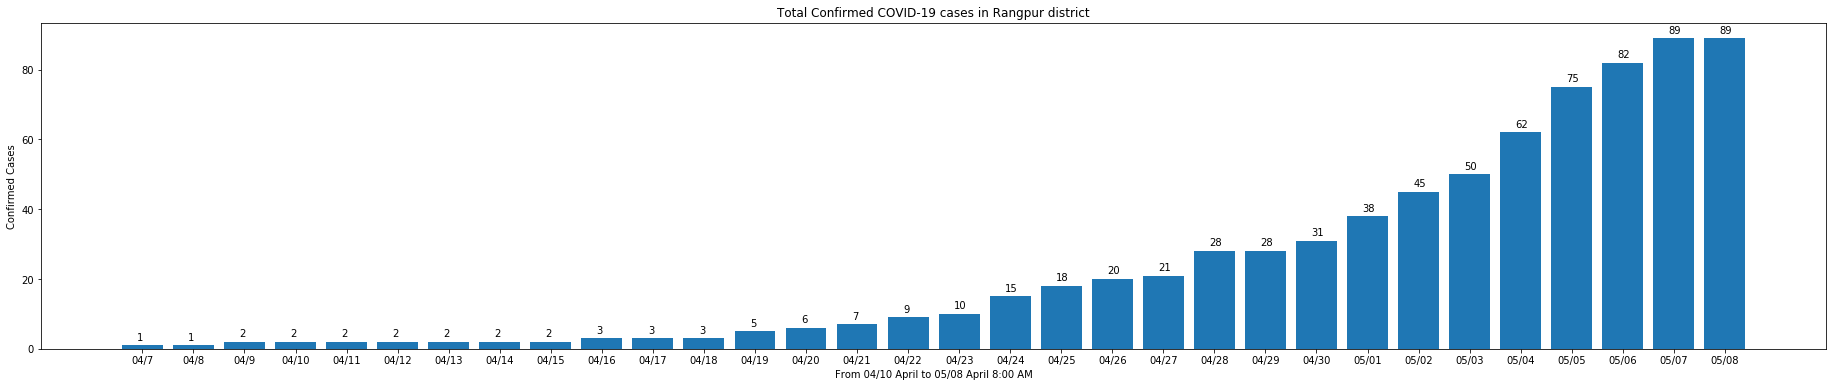

In [3]:
plot_district("Rangpur")

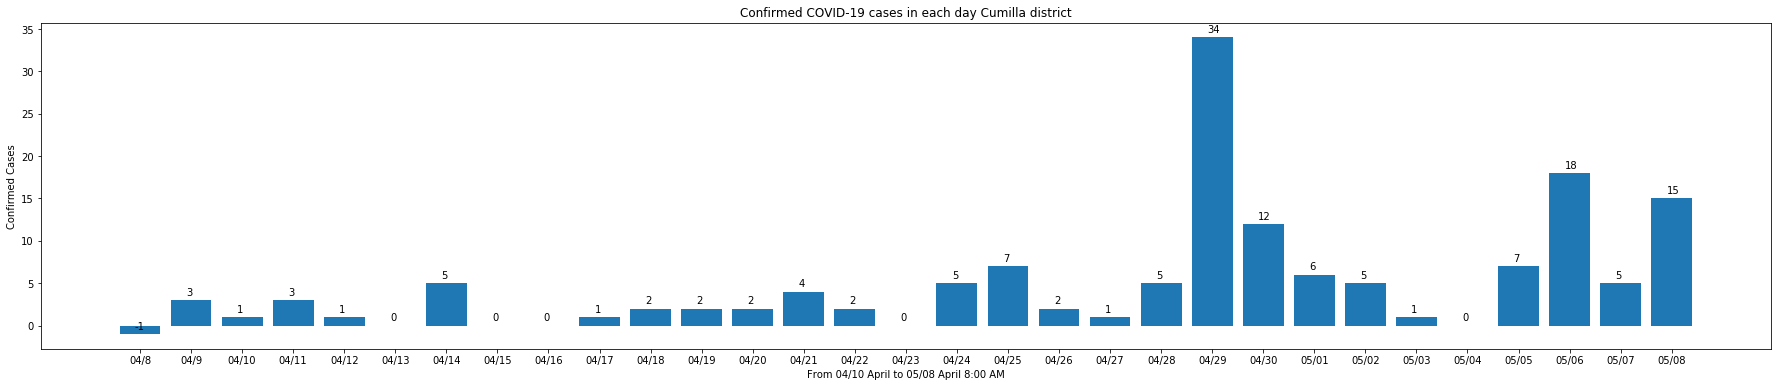

In [5]:
plot_district_inc('Cumilla')


In [6]:
numbers_by_division(data, "2020/05/08")

Division
Dhaka         8677
Chattogram     576
Mymensingh     400
Rangpur        263
Khulna         211
Sylhet         163
Rajshahi       153
Barishal       130
Name: 2020/05/08, dtype: int64

In [7]:
sum(data.groupby('Division')['2020/05/08'].sum().sort_values(ascending=False))

10573

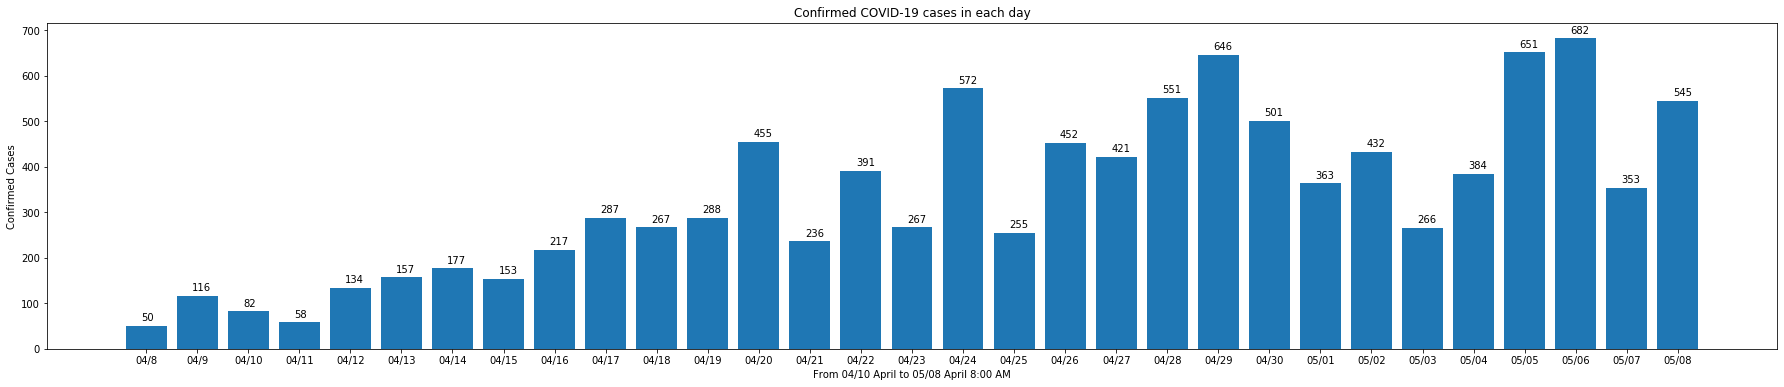

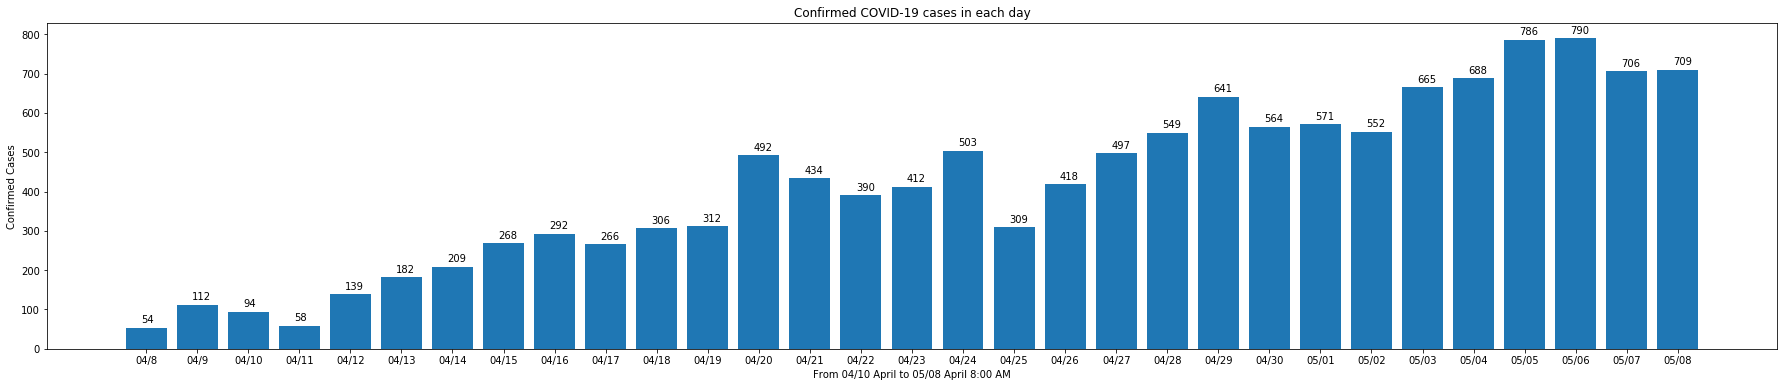

[4, -4, 12, 0, 5, 25, 32, 115, 75, -21, 39, 24, 37, 198, -1, 145, -69, 54, -34, 76, -2, -5, 63, 208, 120, 399, 304, 135, 108, 353, 164]
2559


In [8]:
col = list(data.head())
df = (data[col[2:]].sum()).values.tolist()
t1 = [df[i]-df[i-1] for i in range(1,len(df))]
x = [(s.replace('2020/','')) for s in col[3:]]
plot_in(x,t1)
t2 = [54,112,94,58,139,182,209,268,292,266,306,312,492,434,390,412,503,309,418,497,549,641,564,571,552,665,688,786,790,706,709]
plot_in(x,t2)
print([t2[i]-t1[i] for i in range(len(t1))])
print(sum([t2[i]-t1[i] for i in range(len(t1))]))


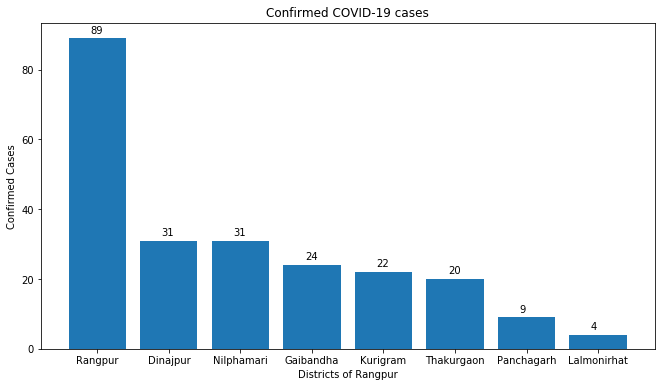

In [8]:
latest_update_division("Rangpur")
    

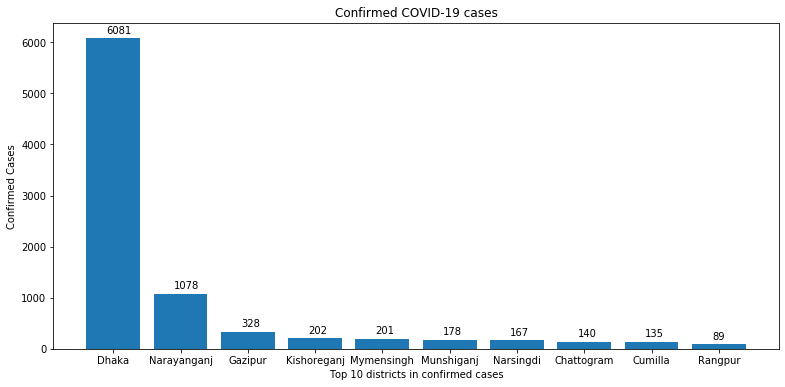

In [9]:
top_districts(10)
